In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline


import nltk
nltk.download('stopwords')
data = pd.read_excel('Data Pakai Label.xlsx', sheet_name='Filter (10752)')
data
data.info()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10752 entries, 0 to 10751
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   userName              10752 non-null  object        
 1   content               10752 non-null  object        
 2   score                 10752 non-null  int64         
 3   reviewCreatedVersion  10752 non-null  object        
 4   at                    10752 non-null  datetime64[ns]
 5   Sentimen Akhir        10752 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 504.1+ KB


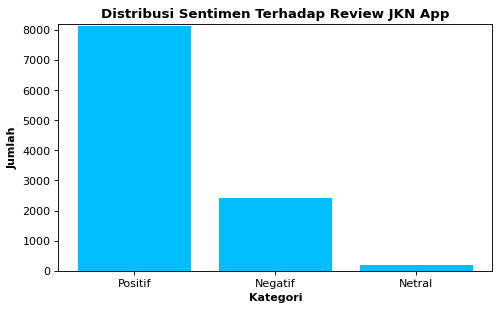

In [ ]:
# Hitung jumlah tiap kategori sentimen
height = data['Sentimen Akhir'].value_counts()

# Ambil nama kategori sebagai label
labels = height.index.tolist()

# Posisi label pada x-axis
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0, max(height) + 50)  # Atur batas y sesuai data
plt.title('Distribusi Sentimen Terhadap Review JKN App', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')

colors = ['deepskyblue', 'royalblue'] if len(labels) == 2 else ['deepskyblue'] * len(labels)

plt.bar(y_pos, height, color=colors)
plt.xticks(y_pos, labels)
plt.show()

In [8]:
# === 1. Import Library ===
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# === 2. Unduh dan Baca Korpus Slangword ===
import requests

url = 'https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv'
r = requests.get(url)
with open('key_norm.csv', 'wb') as f:
    f.write(r.content)
key_norm = pd.read_csv('key_norm.csv')

!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
key_norm = pd.read_csv('key_norm.csv')

# === 3. Buat Fungsi Preprocessing ===

# Case folding
def casefolding(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # hapus URL
    text = re.sub(r'[-+]?[0-9]+', '', text)            # hapus angka
    text = re.sub(r'[^\w\s]', '', text)                # hapus tanda baca
    text = text.strip()
    return text

# Normalisasi kata slang
def text_normalize(text):
    return ' '.join([
        key_norm[key_norm['singkat'] == word]['hasil'].values[0]
        if (key_norm['singkat'] == word).any()
        else word
        for word in text.split()
    ])

# Stopword removal
stopwords_ind = stopwords.words('indonesian')
stopwords_ind = stopwords_ind 

def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in stopwords_ind])

# Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return stemmer.stem(text)

# Gabungkan semua langkah preprocessing
def preprocess_text(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

# === 4. Terapkan pada kolom "content" dan buat kolom baru ===
data['clean_content'] = data['content'].apply(preprocess_text)

# === 5. Lihat hasilnya ===
print("Raw :", data['content'].iloc[0])
print("Cleaned :", data['clean_content'].iloc[0])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
'wget' is not recognized as an internal or external command,
operable program or batch file.


Raw : Saya kasi bintang 1 dulu ya. Tolong diperbaiki, diberikan kemampuan untuk scroll saat layar lebih kecil dari kontennya. Contohnya saat ada di form "Pembaharuan Syarat dan Ketentuan Layanan Program JKN-KIS". Saya tidak bisa klik checkbox " Setuju" karena tidak bisa di scroll.
Cleaned : kasih bintang ya tolong baik mampu scroll layar konten contoh form baharu syarat tentu layan program jknkis klik checkbox tuju scroll


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# === 5. Feature Extraction dengan CountVectorizer ===
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_count = count_vect.fit_transform(data['clean_content'])

# Tampilkan jumlah fitur dan beberapa fitur teratas
print("Jumlah fitur:", len(count_vect.get_feature_names_out()))
print("Beberapa fitur teratas:", count_vect.get_feature_names_out()[:20])

# Jika mau lihat dataframe fitur (jumlah token per kata), bisa diubah ke array dan dataframe:
data_count = pd.DataFrame(X_count.toarray(), columns=count_vect.get_feature_names_out())
print(data_count.head())

# === 6. Split Data Train-Test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_count, data['Sentimen Akhir'], test_size=0.2, random_state=42, stratify=data['Sentimen Akhir']
)


Jumlah fitur: 4997
Beberapa fitur teratas: ['aaaah' 'aajaa' 'aalamiin' 'aamiiin' 'aamiin' 'abai' 'abal' 'abalagak'
 'abdate' 'abgus' 'abia' 'abiss' 'abrek' 'absen' 'abu' 'abutidak' 'acara'
 'acc' 'account' 'aceh']
   aaaah  aajaa  aalamiin  aamiiin  aamiin  abai  abal  abalagak  abdate  \
0      0      0         0        0       0     0     0         0       0   
1      0      0         0        0       0     0     0         0       0   
2      0      0         0        0       0     0     0         0       0   
3      0      0         0        0       0     0     0         0       0   
4      0      0         0        0       0     0     0         0       0   

   abgus  ...  ykode  yooo  yooopokoke  yuhu  yyyu  zaman  zebelumnya  zhalim  \
0      0  ...      0     0           0     0     0      0           0       0   
1      0  ...      0     0           0     0     0      0           0       0   
2      0  ...      0     0           0     0     0      0           0       0   
3    

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from joblib import dump
import numpy as np
from sklearn.model_selection import ShuffleSplit, cross_val_score

# Gunakan X_count dan y dari kolom 'Sentimen Akhir'
y = data['Sentimen Akhir']

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=50)

# Inisialisasi dan latih model SVC
algorithm_svc = SVC()
model = algorithm_svc.fit(X_train, y_train)

# Simpan model
dump(model, filename='model_1.joblib')
['model_1.joblib']

# Gunakan model yang telah dilatih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
print(model_pred)

# Tampilkan label sebenarnya pada data uji
print(y_test)


['Negatif' 'Positif' 'Negatif' ... 'Positif' 'Positif' 'Positif']
4993     Negatif
2607     Positif
4069     Negatif
10479    Positif
406      Positif
          ...   
10444    Positif
2222     Positif
916      Positif
7203     Positif
3528     Positif
Name: Sentimen Akhir, Length: 2151, dtype: object


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd

# Proporsi data testing dari 10% hingga 90%
split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
rows = []

# Label target
y = data['Sentimen Akhir']

# Loop untuk tiap proporsi
for test_ratio in split_ratios:
    train_ratio = 1 - test_ratio
    X_train, X_test, y_train, y_test = train_test_split(
        X_count, y, test_size=test_ratio, random_state=42, stratify=y
    )

    # Inisialisasi dan latih model SVM
    model = SVC()
    model.fit(X_train, y_train)

    # Prediksi pada data uji
    model_pred = model.predict(X_test)

    # Hitung distribusi label di data test
    label_counts = y_test.value_counts().to_dict()
    positif = label_counts.get('Positif', 0)
    negatif = label_counts.get('Negatif', 0)
    netral = label_counts.get('Netral', 0)

    # Evaluasi akurasi manual
    benar = (model_pred == y_test).sum()
    salah = (model_pred != y_test).sum()
    akurasi = benar / (benar + salah) * 100

    rows.append({
        'Training (%)': round(train_ratio * 100),
        'Testing (%)': round(test_ratio * 100),
        'Positif': positif,
        'Negatif': negatif,
        'Netral': netral
    })

# Tampilkan sebagai DataFrame
df_svm_split = pd.DataFrame(rows)
print("Tabel Jumlah ulasan dengan perubahan data training dan testing pada model SVM\n")
print(df_svm_split.to_string(index=False))


Tabel Jumlah ulasan dengan perubahan data training dan testing pada model SVM

 Training (%)  Testing (%)  Positif  Negatif  Netral
           90           10      814      241      21
           80           20     1628      481      42
           70           30     2442      722      62
           60           40     3255      963      83
           50           50     4069     1203     104
           40           60     4883     1444     125
           30           70     5697     1684     146
           20           80     6511     1925     166
           10           90     7324     2166     187


In [49]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
rows = []

for test_ratio in split_ratios:
    train_ratio = 1 - test_ratio
    X_train, X_test, y_train, y_test = train_test_split(
        X_count, data['Sentimen Akhir'], test_size=test_ratio, random_state=42, stratify=data['Sentimen Akhir']
    )

    model_svm = SVC()
    model_svm.fit(X_train, y_train)
    y_pred_svm = model_svm.predict(X_test)
    report_svm = classification_report(y_test, y_pred_svm, output_dict=True, zero_division=0)

    # Hitung jumlah prediksi benar dan salah
    prediksi_benar = (y_pred_svm == y_test).sum()
    prediksi_salah = (y_pred_svm != y_test).sum()

    rows.append({
        'Training (%)': round(train_ratio * 100, 1),
        'Testing (%)': round(test_ratio * 100, 1),
        'Akurasi (%)': report_svm['accuracy'] * 100,
        'Precision (%)': report_svm['macro avg']['precision'] * 100,
        'Recall (%)': report_svm['macro avg']['recall'] * 100,
        'F1-Score (%)': report_svm['macro avg']['f1-score'] * 100,
        'Prediksi Benar': prediksi_benar,
        'Prediksi Salah': prediksi_salah
    })

# Buat DataFrame dan tampilkan
df_svm_eval = pd.DataFrame(rows)
print("=== Evaluasi Training & Testing Model SVM ===")
print(df_svm_eval.to_string(index=False))

# Tambahkan evaluasi cross-validation
model_svm = SVC()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)
cv_accuracy = cross_val_score(model_svm, X_count, data['Sentimen Akhir'], cv=cv, scoring='accuracy')
avg_accuracy = np.mean(cv_accuracy)

print("\n=== Evaluasi Cross-Validation SVM ===")
print('Akurasi setiap split:', np.round(cv_accuracy, 4))
print('Rata-rata akurasi pada cross-validation:', round(avg_accuracy * 100, 2), '%')


=== Evaluasi Training & Testing Model SVM ===
 Training (%)  Testing (%)  Akurasi (%)  Precision (%)  Recall (%)  F1-Score (%)  Prediksi Benar  Prediksi Salah
         90.0         10.0    93.587361      60.808337   62.559089     61.665495            1007              69
         80.0         20.0    93.258949      93.886570   62.792013     62.816499            2006             145
         70.0         30.0    93.273404      77.228753   63.062476     63.284939            3009             217
         60.0         40.0    93.280632      93.803236   63.979087     64.996735            4012             289
         50.0         50.0    93.136161      88.033499   63.461693     64.073277            5007             369
         40.0         60.0    92.715437      87.754485   62.619356     63.168268            5982             470
         30.0         70.0    92.320978      83.644548   61.835256     62.438739            6949             578
         20.0         80.0    91.897233      83.43

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)
cv_accuracy = cross_val_score(model, X_count, y, cv=cv, scoring='accuracy')
avg_accuracy = np.mean(cv_accuracy)

#model prediksi & data asli
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Model Support Vector Machine')
print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%' '\n')

print('Akurasi setiap split:', cv_accuracy)
print('Rata-rata akurasi pada cross validation:', avg_accuracy)


Model Support Vector Machine
Jumlah prediksi benar	: 2020
Jumlah prediksi salah	: 131
Akurasi pengujian	: 93.90980939098094 %

Akurasi setiap split: [0.93909809 0.93026499 0.93584379 0.92654579 0.93212459 0.93119479
 0.93165969 0.92236169 0.93026499 0.94142259]
Rata-rata akurasi pada cross validation: 0.9320781032078104


In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from joblib import dump
import numpy as np

# Gunakan X_count dan y dari kolom 'Sentimen Akhir'
y = data['Sentimen Akhir']

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=50)

# Inisialisasi dan latih model Naive Bayes
algorithm_nb = MultinomialNB()
model = algorithm_nb.fit(X_train, y_train)

# Simpan model
dump(model, filename='model_2.joblib')
['model_2.joblib']

# Gunakan model yang telah dilatih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
print(model_pred)

# Tampilkan label sebenarnya pada data uji
print(y_test)

['Negatif' 'Positif' 'Negatif' ... 'Positif' 'Positif' 'Positif']
4993     Negatif
2607     Positif
4069     Negatif
10479    Positif
406      Positif
          ...   
10444    Positif
2222     Positif
916      Positif
7203     Positif
3528     Positif
Name: Sentimen Akhir, Length: 2151, dtype: object


In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pandas as pd

split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
rows = []

y = data['Sentimen Akhir']

for test_ratio in split_ratios:
    train_ratio = 1 - test_ratio
    X_train, X_test, y_train, y_test = train_test_split(
        X_count, y, test_size=test_ratio, random_state=42, stratify=y
    )

    # Inisialisasi dan latih model Naive Bayes
    model = MultinomialNB()
    model.fit(X_train, y_train)

    # Prediksi pada data uji
    model_pred = model.predict(X_test)

    # Hitung distribusi label di data test
    label_counts = y_test.value_counts().to_dict()
    positif = label_counts.get('Positif', 0)
    negatif = label_counts.get('Negatif', 0)
    netral = label_counts.get('Netral', 0)

    rows.append({
        'Training (%)': round(train_ratio * 100),
        'Testing (%)': round(test_ratio * 100),
        'Positif': positif,
        'Negatif': negatif,
        'Netral': netral
    })

# Tampilkan sebagai DataFrame
df_nb_split = pd.DataFrame(rows)
print("Tabel Jumlah ulasan dengan perubahan data training dan testing pada model Naive Bayes\n")
print(df_nb_split.to_string(index=False))


Tabel Jumlah ulasan dengan perubahan data training dan testing pada model Naive Bayes

 Training (%)  Testing (%)  Positif  Negatif  Netral
           90           10      814      241      21
           80           20     1628      481      42
           70           30     2442      722      62
           60           40     3255      963      83
           50           50     4069     1203     104
           40           60     4883     1444     125
           30           70     5697     1684     146
           20           80     6511     1925     166
           10           90     7324     2166     187


In [53]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
rows = []

for test_ratio in split_ratios:
    train_ratio = 1 - test_ratio
    X_train, X_test, y_train, y_test = train_test_split(
        X_count, data['Sentimen Akhir'], test_size=test_ratio, random_state=42, stratify=data['Sentimen Akhir']
    )

    model_nb = MultinomialNB()
    model_nb.fit(X_train, y_train)
    y_pred_nb = model_nb.predict(X_test)
    report_nb = classification_report(y_test, y_pred_nb, output_dict=True, zero_division=0)

    # Hitung jumlah prediksi benar dan salah
    prediksi_benar = (y_pred_nb == y_test).sum()
    prediksi_salah = (y_pred_nb != y_test).sum()

    rows.append({
        'Training (%)': round(train_ratio * 100, 1),
        'Testing (%)': round(test_ratio * 100, 1),
        'Akurasi (%)': report_nb['accuracy'] * 100,
        'Precision (%)': report_nb['macro avg']['precision'] * 100,
        'Recall (%)': report_nb['macro avg']['recall'] * 100,
        'F1-Score (%)': report_nb['macro avg']['f1-score'] * 100,
        'Prediksi Benar': prediksi_benar,
        'Prediksi Salah': prediksi_salah
    })

# Buat DataFrame dan tampilkan
df_nb_eval = pd.DataFrame(rows)
print("=== Evaluasi Training & Testing Model Naive Bayes ===")
print(df_nb_eval.to_string(index=False))

# Tambahkan evaluasi cross-validation
model_nb = MultinomialNB()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)
cv_accuracy = cross_val_score(model_nb, X_count, data['Sentimen Akhir'], cv=cv, scoring='accuracy')
avg_accuracy = np.mean(cv_accuracy)

print("\n=== Evaluasi Cross-Validation ===")
print('Akurasi setiap split:', np.round(cv_accuracy, 4))
print('Rata-rata akurasi pada cross-validation:', round(avg_accuracy * 100, 2), '%')


=== Evaluasi Training & Testing Model Naive Bayes ===
 Training (%)  Testing (%)  Akurasi (%)  Precision (%)  Recall (%)  F1-Score (%)  Prediksi Benar  Prediksi Salah
         90.0         10.0    94.888476      67.894300   64.776103     65.230011            1021              55
         80.0         20.0    94.653649      67.098422   63.601564     63.927163            2036             115
         70.0         30.0    94.606324      70.696553   63.649427     64.362532            3052             174
         60.0         40.0    94.536154      69.567740   63.431105     63.836705            4066             235
         50.0         50.0    94.289435      72.872445   63.052152     63.292853            5069             307
         40.0         60.0    94.156851      69.978662   62.588776     62.494799            6075             377
         30.0         70.0    93.755812      69.653076   62.051396     62.007705            7057             470
         20.0         80.0    93.338758   

In [13]:
# Hitung jumlah data yang berhasil diprediksi & yang salah
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

# Cross-validation menggunakan ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)
cv_accuracy = cross_val_score(model, X_count, data['Sentimen Akhir'], cv=cv, scoring='accuracy')
avg_accuracy = np.mean(cv_accuracy)

# === 7. Evaluasi ===
print('Model Naive Bayes')
print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah) * 100
print('Akurasi pengujian\t:', accuracy, '%' '\n')

print('Akurasi setiap split:', cv_accuracy)
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Model Naive Bayes
Jumlah prediksi benar	: 2044
Jumlah prediksi salah	: 107
Akurasi pengujian	: 95.02556950255695 %

Akurasi setiap split: [0.9502557  0.94653649 0.94700139 0.93863319 0.94235239 0.94002789
 0.94467689 0.94188749 0.94281729 0.94793119]
Rata-rata akurasi pada cross validation: 0.9442119944211994


=== Evaluasi Model SVM ===
              precision    recall  f1-score   support

     Negatif       0.86      0.91      0.88       487
      Netral       0.00      0.00      0.00        29
     Positif       0.97      0.96      0.96      1635

    accuracy                           0.94      2151
   macro avg       0.61      0.63      0.62      2151
weighted avg       0.93      0.94      0.93      2151



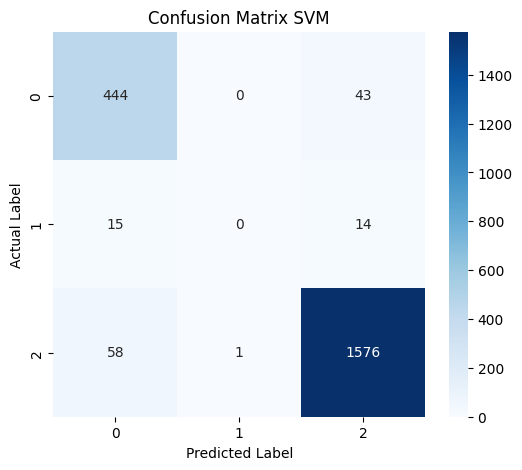

=== Evaluasi Model Naive Bayes ===
              precision    recall  f1-score   support

     Negatif       0.90      0.91      0.91       487
      Netral       0.00      0.00      0.00        29
     Positif       0.97      0.98      0.97      1635

    accuracy                           0.95      2151
   macro avg       0.62      0.63      0.63      2151
weighted avg       0.94      0.95      0.95      2151



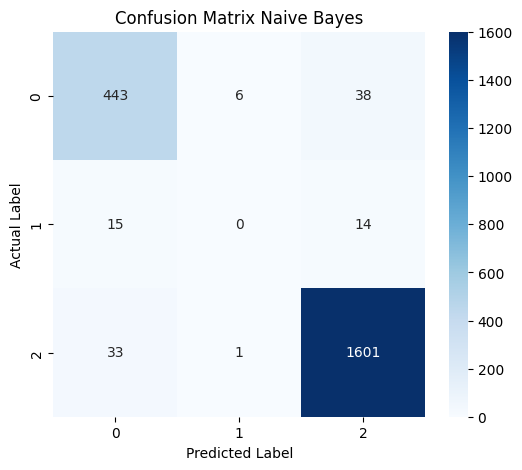

In [ ]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Load model
model_svm = joblib.load('model_1.joblib')
model_nb = joblib.load('model_2.joblib')

# Prediksi ulang menggunakan model yang sudah dilatih dengan data asli
model_pred_svm = model_svm.predict(X_test)
model_pred_nb = model_nb.predict(X_test)

# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Evaluasi SVM
print('=== Evaluasi Model SVM ===')
print(classification_report(y_test, model_pred_svm))
plot_confusion_matrix(y_test, model_pred_svm, 'Confusion Matrix SVM')

# Evaluasi Naive Bayes
print('=== Evaluasi Model Naive Bayes ===')
print(classification_report(y_test, model_pred_nb))
plot_confusion_matrix(y_test, model_pred_nb, 'Confusion Matrix Naive Bayes')


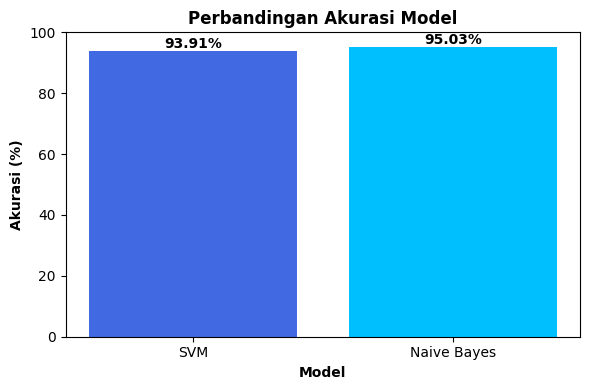

In [15]:
import matplotlib.pyplot as plt

# Akurasi hasil prediksi model (bukan dari cross-validation)
akurasi_svm = (model_pred_svm == y_test).sum() / len(y_test) * 100
akurasi_nb = (model_pred_nb == y_test).sum() / len(y_test) * 100

# Data untuk bar chart
model_names = ['SVM', 'Naive Bayes']
accuracies = [akurasi_svm, akurasi_nb]
colors = ['royalblue', 'deepskyblue']

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(model_names, accuracies, color=colors)
plt.ylim(0, 100)  # Batas atas y-axis 100 persen
plt.title('Perbandingan Akurasi Model', fontweight='bold')
plt.ylabel('Akurasi (%)', fontweight='bold')
plt.xlabel('Model', fontweight='bold')

# Tampilkan akurasi di atas masing-masing bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [16]:
# Simpan hasil prediksi ke DataFrame
hasil_prediksi = pd.DataFrame({
    'Konten Asli': data['content'].iloc[y_test.index],
    'Konten Bersih': data['clean_content'].iloc[y_test.index],
    'Sentimen Asli': y_test,
    'Prediksi SVM': model_pred_svm,
    'Prediksi Naive Bayes': model_pred_nb
})

# Simpan ke Excel
hasil_prediksi.to_excel('Hasil_Prediksi_Sentimen.xlsx', index=False)


In [17]:
# Contoh salah prediksi oleh SVM
salah_prediksi_svm = hasil_prediksi[hasil_prediksi['Sentimen Asli'] != hasil_prediksi['Prediksi SVM']]
print("Salah prediksi SVM:")
print(salah_prediksi_svm.head())

# Contoh salah prediksi oleh Naive Bayes
salah_prediksi_nb = hasil_prediksi[hasil_prediksi['Sentimen Asli'] != hasil_prediksi['Prediksi Naive Bayes']]
print("Salah prediksi Naive Bayes:")
print(salah_prediksi_nb.head())


Salah prediksi SVM:
                                            Konten Asli  \
4687  Lumayan bagus...jadi gak susah lagi monitor kartu   
4292  Karena sampai mengakses posisi di gps, tolong ...   
5405  Kalo bisa penambahan peserta anggota baru bisa...   
6140  Kalo ulasan bagus cepat kalian posting, Coba k...   
5872  Pelayanan tidak 24 jam, padahal sangat di butu...   

                                          Konten Bersih Sentimen Asli  \
4687              lumayan bagusjadi susah monitor kartu       Positif   
4292   akses posisi gps tolong data serta bocor goodjob       Positif   
5405  tambah serta anggota laku aplikasi jkn mobile ...        Netral   
6140          ulas bagus cepat posting coba keluh hapus       Negatif   
5872                                    layan jam butuh       Negatif   

     Prediksi SVM Prediksi Naive Bayes  
4687      Negatif              Positif  
4292      Negatif              Negatif  
5405      Negatif              Positif  
6140      Positif     

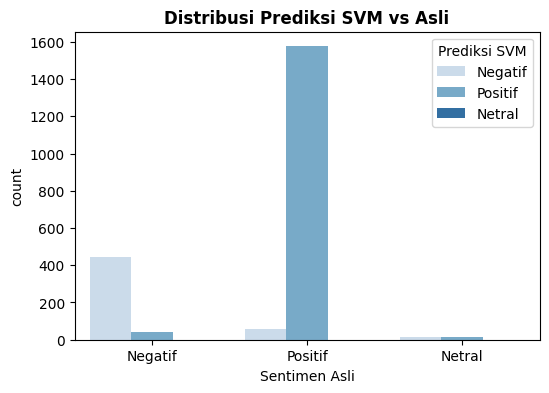

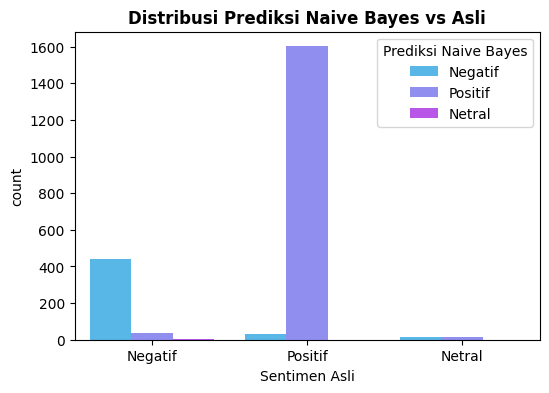

In [18]:
# Visualisasi kesalahan SVM
plt.figure(figsize=(6,4))
sns.countplot(x='Sentimen Asli', hue='Prediksi SVM', data=hasil_prediksi, palette='Blues')
plt.title('Distribusi Prediksi SVM vs Asli', fontweight='bold')
plt.show()

# Visualisasi kesalahan Naive Bayes
plt.figure(figsize=(6,4))
sns.countplot(x='Sentimen Asli', hue='Prediksi Naive Bayes', data=hasil_prediksi, palette='cool')
plt.title('Distribusi Prediksi Naive Bayes vs Asli', fontweight='bold')
plt.show()


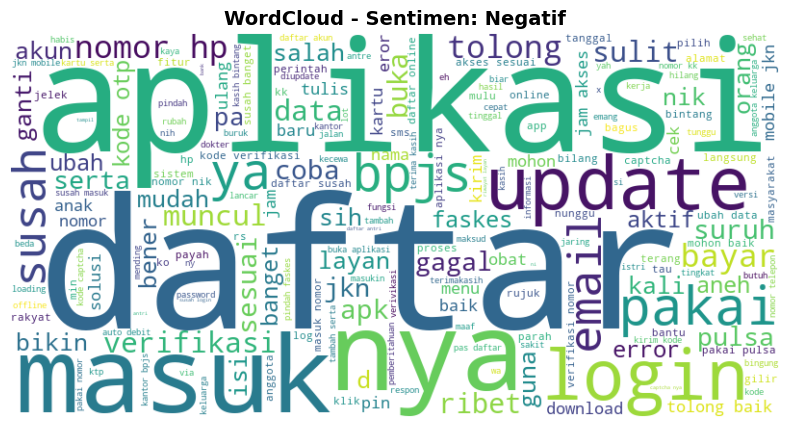

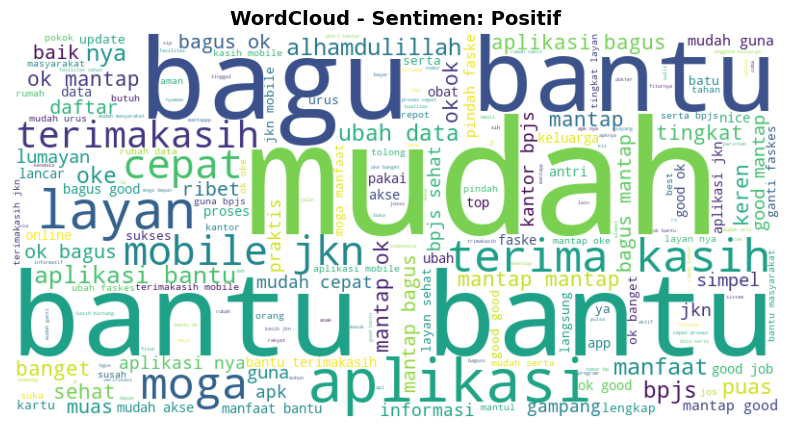

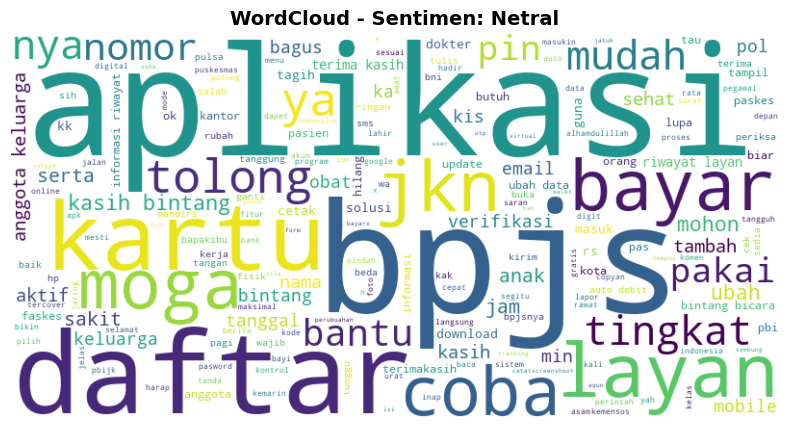

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Buat wordcloud untuk setiap kategori sentimen
kategori_sentimen = data['Sentimen Akhir'].unique()

for sentimen in kategori_sentimen:
    # Ambil semua konten bersih dengan label sentimen tertentu
    text = ' '.join(data[data['Sentimen Akhir'] == sentimen]['clean_content'])
    
    # Buat wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    # Tampilkan
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - Sentimen: {sentimen}', fontweight='bold', fontsize=14)
    plt.show()


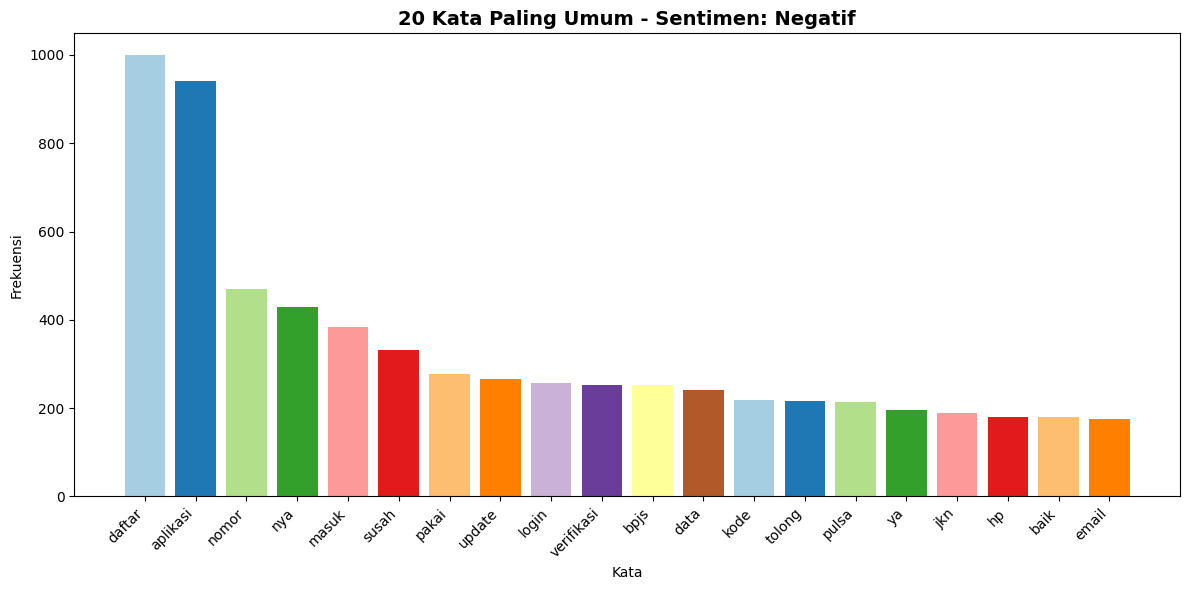

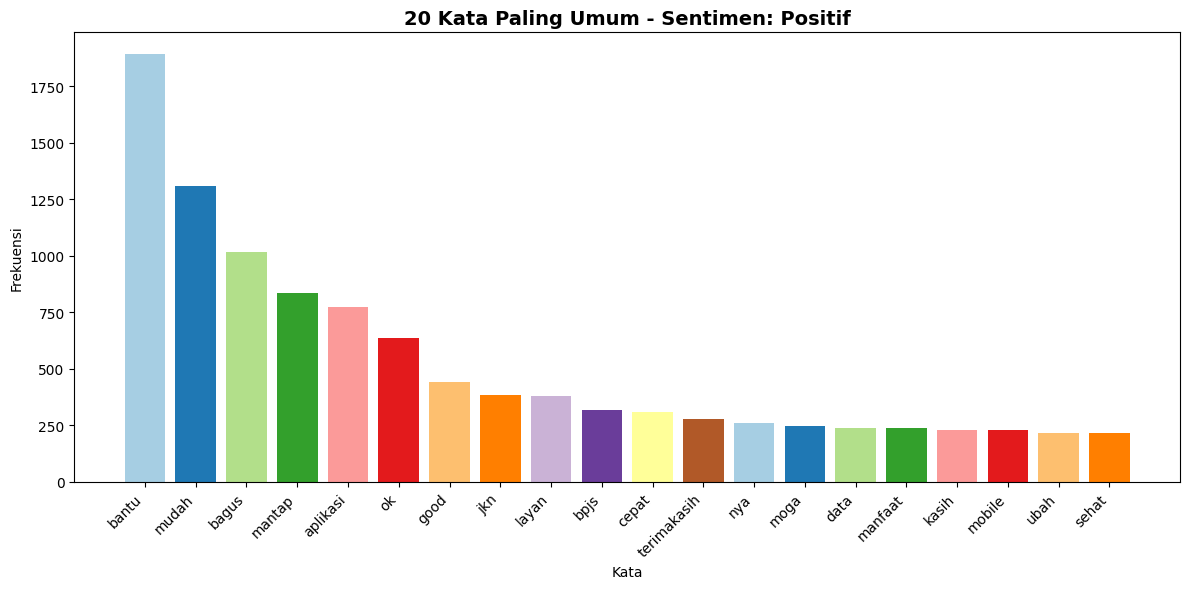

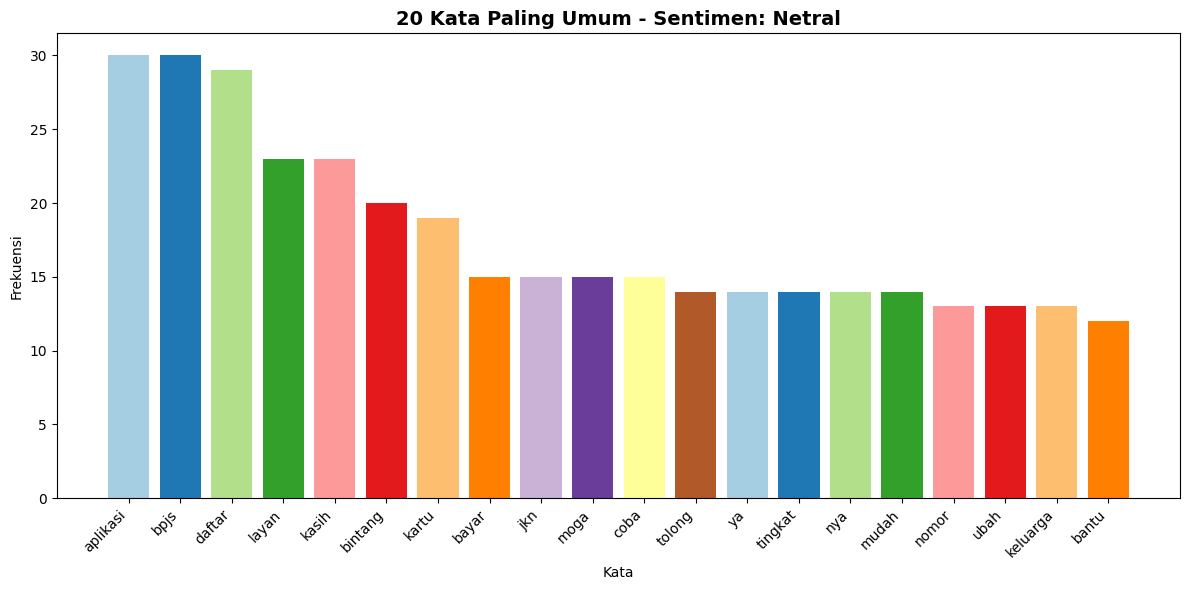

In [57]:
from collections import Counter
import matplotlib.pyplot as plt

# Ambil kategori sentimen unik
kategori_sentimen = data['Sentimen Akhir'].unique()

# Loop untuk setiap kategori
for sentimen in kategori_sentimen:
    # Gabungkan semua teks pada kategori sentimen tertentu
    all_text = ' '.join(data[data['Sentimen Akhir'] == sentimen]['clean_content'])
    
    # Tokenisasi kata
    words = all_text.split()
    
    # Hitung frekuensi kata
    word_freq = Counter(words)
    
    # Ambil 20 kata paling sering muncul
    most_common_words = word_freq.most_common(20)
    
    # Pisahkan kata dan frekuensinya
    words, frequencies = zip(*most_common_words)
    
    # Buat bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(words, frequencies, color=plt.cm.Paired.colors)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'20 Kata Paling Umum - Sentimen: {sentimen}', fontweight='bold', fontsize=14)
    plt.xlabel('Kata')
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()
